# Repressilator

 
This example illustrates the classic **Repressilator** model, based on
Elowitz and Liebler, Nature 2000. The model has the basic architecture::
    
        A ---| B---| C
        T            |
        |            |
        |____________|
    
where **A**, **B**, and **C** are genes whose products repress
eachother. The plunger symbol indicates inhibition. The model 
uses the Gillespie (stochastic) method by default but you can run it
using a deterministic method by saying ``python repressillator.py gsl``
    
Good things to do with this model include:

    * Ask what it would take to change period of repressillator:
            
        * Change inhibitor rates::

            inhib = moose.element( '/model/kinetics/TetR_gene/inhib_reac' )
            moose.showfields( inhib )
            inhib.Kf *= 0.1
    
        * Change degradation rates::

            degrade = moose.element( '/model/kinetics/TetR_gene/TetR_degradation' )
            degrade.Kf *= 10.0
    * Run in stochastic mode:
                
        * Change volumes, figure out how many molecules are present::

            lac = moose.element( '/model/kinetics/lac_gene/lac' )
            print lac.n``

        * Find when it becomes hopelessly unreliable with small volumes.


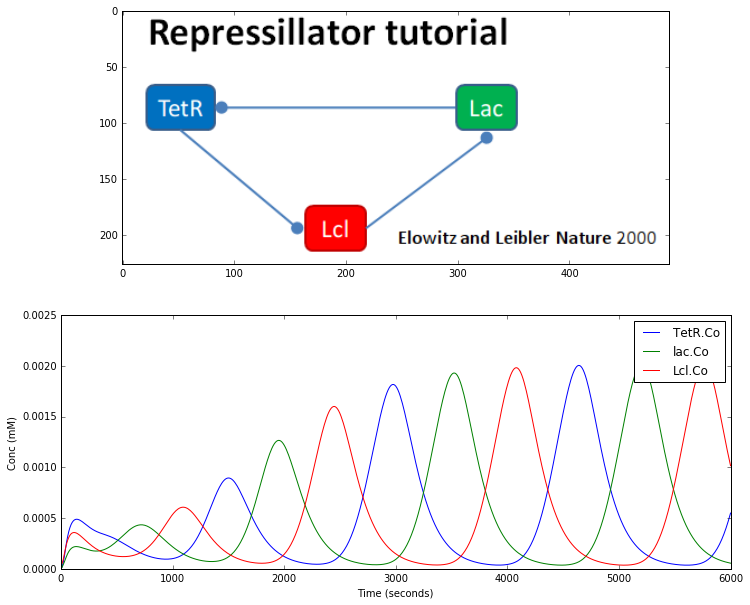

In [3]:
#########################################################################
## This program is part of 'MOOSE', the
## Messaging Object Oriented Simulation Environment.
##           Copyright (C) 2014 Upinder S. Bhalla. and NCBS
## It is made available under the terms of the
## GNU Lesser General Public License version 2.1
## See the file COPYING.LIB for the full notice.
#########################################################################

import moose
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pylab
import numpy
import sys

def main():
   
    #solver = "gsl"  # Pick any of gsl, gssa, ee..
    solver = "gssa"  # Pick any of gsl, gssa, ee..
    mfile = './Repressillator.g'
    runtime = 6000.0
    if ( len( sys.argv ) >= 2 ):
        solver = sys.argv[1]
    modelId = moose.loadModel( mfile, 'model', solver )
    # Increase volume so that the stochastic solver gssa 
    # gives an interesting output
    compt = moose.element( '/model/kinetics' )
    compt.volume = 1e-19 
    dt = moose.element( '/clock' ).tickDt[18]

    moose.reinit()
    moose.start( runtime ) 

    # Display all plots.
    img = mpimg.imread( 'repressillatorOsc.png' )
    fig = plt.figure( figsize=(12, 10 ) )
    png = fig.add_subplot( 211 )
    imgplot = plt.imshow( img )
    ax = fig.add_subplot( 212 )
    x = moose.wildcardFind( '/model/#graphs/conc#/#' )
    plt.ylabel( 'Conc (mM)' )
    plt.xlabel( 'Time (seconds)' )
    for x in moose.wildcardFind( '/model/#graphs/conc#/#' ):
        t = numpy.arange( 0, x.vector.size, 1 ) * dt
        pylab.plot( t, x.vector, label=x.name )
    pylab.legend()
    pylab.show()

# Run the 'main' if this script is executed standalone.
if __name__ == '__main__':
	main()